In [49]:
import numpy as np
import pandas as pd
import warnings

In [50]:
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv("/users/raunakchhabra/54339-104884-bundle-archive/HAM10000_metadata.csv")


In [52]:
from sklearn import preprocessing 

In [53]:
label_encoder = preprocessing.LabelEncoder()

In [54]:
df['sex']= label_encoder.fit_transform(df['sex'])

In [55]:
df['dx_type']= label_encoder.fit_transform(df['dx_type'])

In [56]:
df['localization']= label_encoder.fit_transform(df['localization'])

In [57]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,3,80.0,1,11
1,HAM_0000118,ISIC_0025030,bkl,3,80.0,1,11
2,HAM_0002730,ISIC_0026769,bkl,3,80.0,1,11
3,HAM_0002730,ISIC_0025661,bkl,3,80.0,1,11
4,HAM_0001466,ISIC_0031633,bkl,3,75.0,1,4
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,3,40.0,1,0
10011,HAM_0002867,ISIC_0033550,akiec,3,40.0,1,0
10012,HAM_0002867,ISIC_0033536,akiec,3,40.0,1,0
10013,HAM_0000239,ISIC_0032854,akiec,3,80.0,1,5


In [58]:
df.dx = [1 if each == 'bkl' or each == 'nv' or each == 'df' else 0 for each in df.dx]

In [59]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,1,3,80.0,1,11
1,HAM_0000118,ISIC_0025030,1,3,80.0,1,11
2,HAM_0002730,ISIC_0026769,1,3,80.0,1,11
3,HAM_0002730,ISIC_0025661,1,3,80.0,1,11
4,HAM_0001466,ISIC_0031633,1,3,75.0,1,4
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,0,3,40.0,1,0
10011,HAM_0002867,ISIC_0033550,0,3,40.0,1,0
10012,HAM_0002867,ISIC_0033536,0,3,40.0,1,0
10013,HAM_0000239,ISIC_0032854,0,3,80.0,1,5


In [60]:
df = df.dropna()

In [61]:
df = df.drop(['lesion_id','image_id'],axis=1)

In [62]:
df

,dx,dx_type,age,sex,localization
0,1,3,80.0,1,11
1,1,3,80.0,1,11
2,1,3,80.0,1,11
3,1,3,80.0,1,11
4,1,3,75.0,1,4
...,...,...,...,...,...
10010,0,3,40.0,1,0
10011,0,3,40.0,1,0
10012,0,3,40.0,1,0
10013,0,3,80.0,1,5


In [63]:
x = df.drop('dx',axis=1)
y = df['dx']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [69]:
from sklearn.svm import SVC

In [70]:
our_model_svc = SVC()
our_model_svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
y_predict = our_model_svc.predict(x_test)

In [72]:
from sklearn.metrics import classification_report , confusion_matrix

In [73]:
import numpy as np

In [78]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,1772,186
is_healthy,297,235


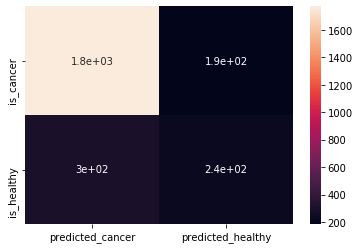

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion, annot=True)